# Titanic Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

### Load the data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean the data

In [4]:
data.info() # to find out if there is any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
mean = data['Age'].mean()

In [6]:
mean

29.69911764705882

In [7]:
data['Age'] = data['Age'].fillna(mean)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data = data.drop(['Ticket' , 'Cabin'], axis =1)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
mode = data['Embarked'].mode()

In [12]:
mode

0    S
dtype: object

In [13]:
data['Embarked'].fillna(mode)
data['Embarked'] = data['Embarked'].fillna('S')
#data['Embarked'].fillna(mode).info

In [14]:
data.Embarked.isna().any()

False

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [16]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

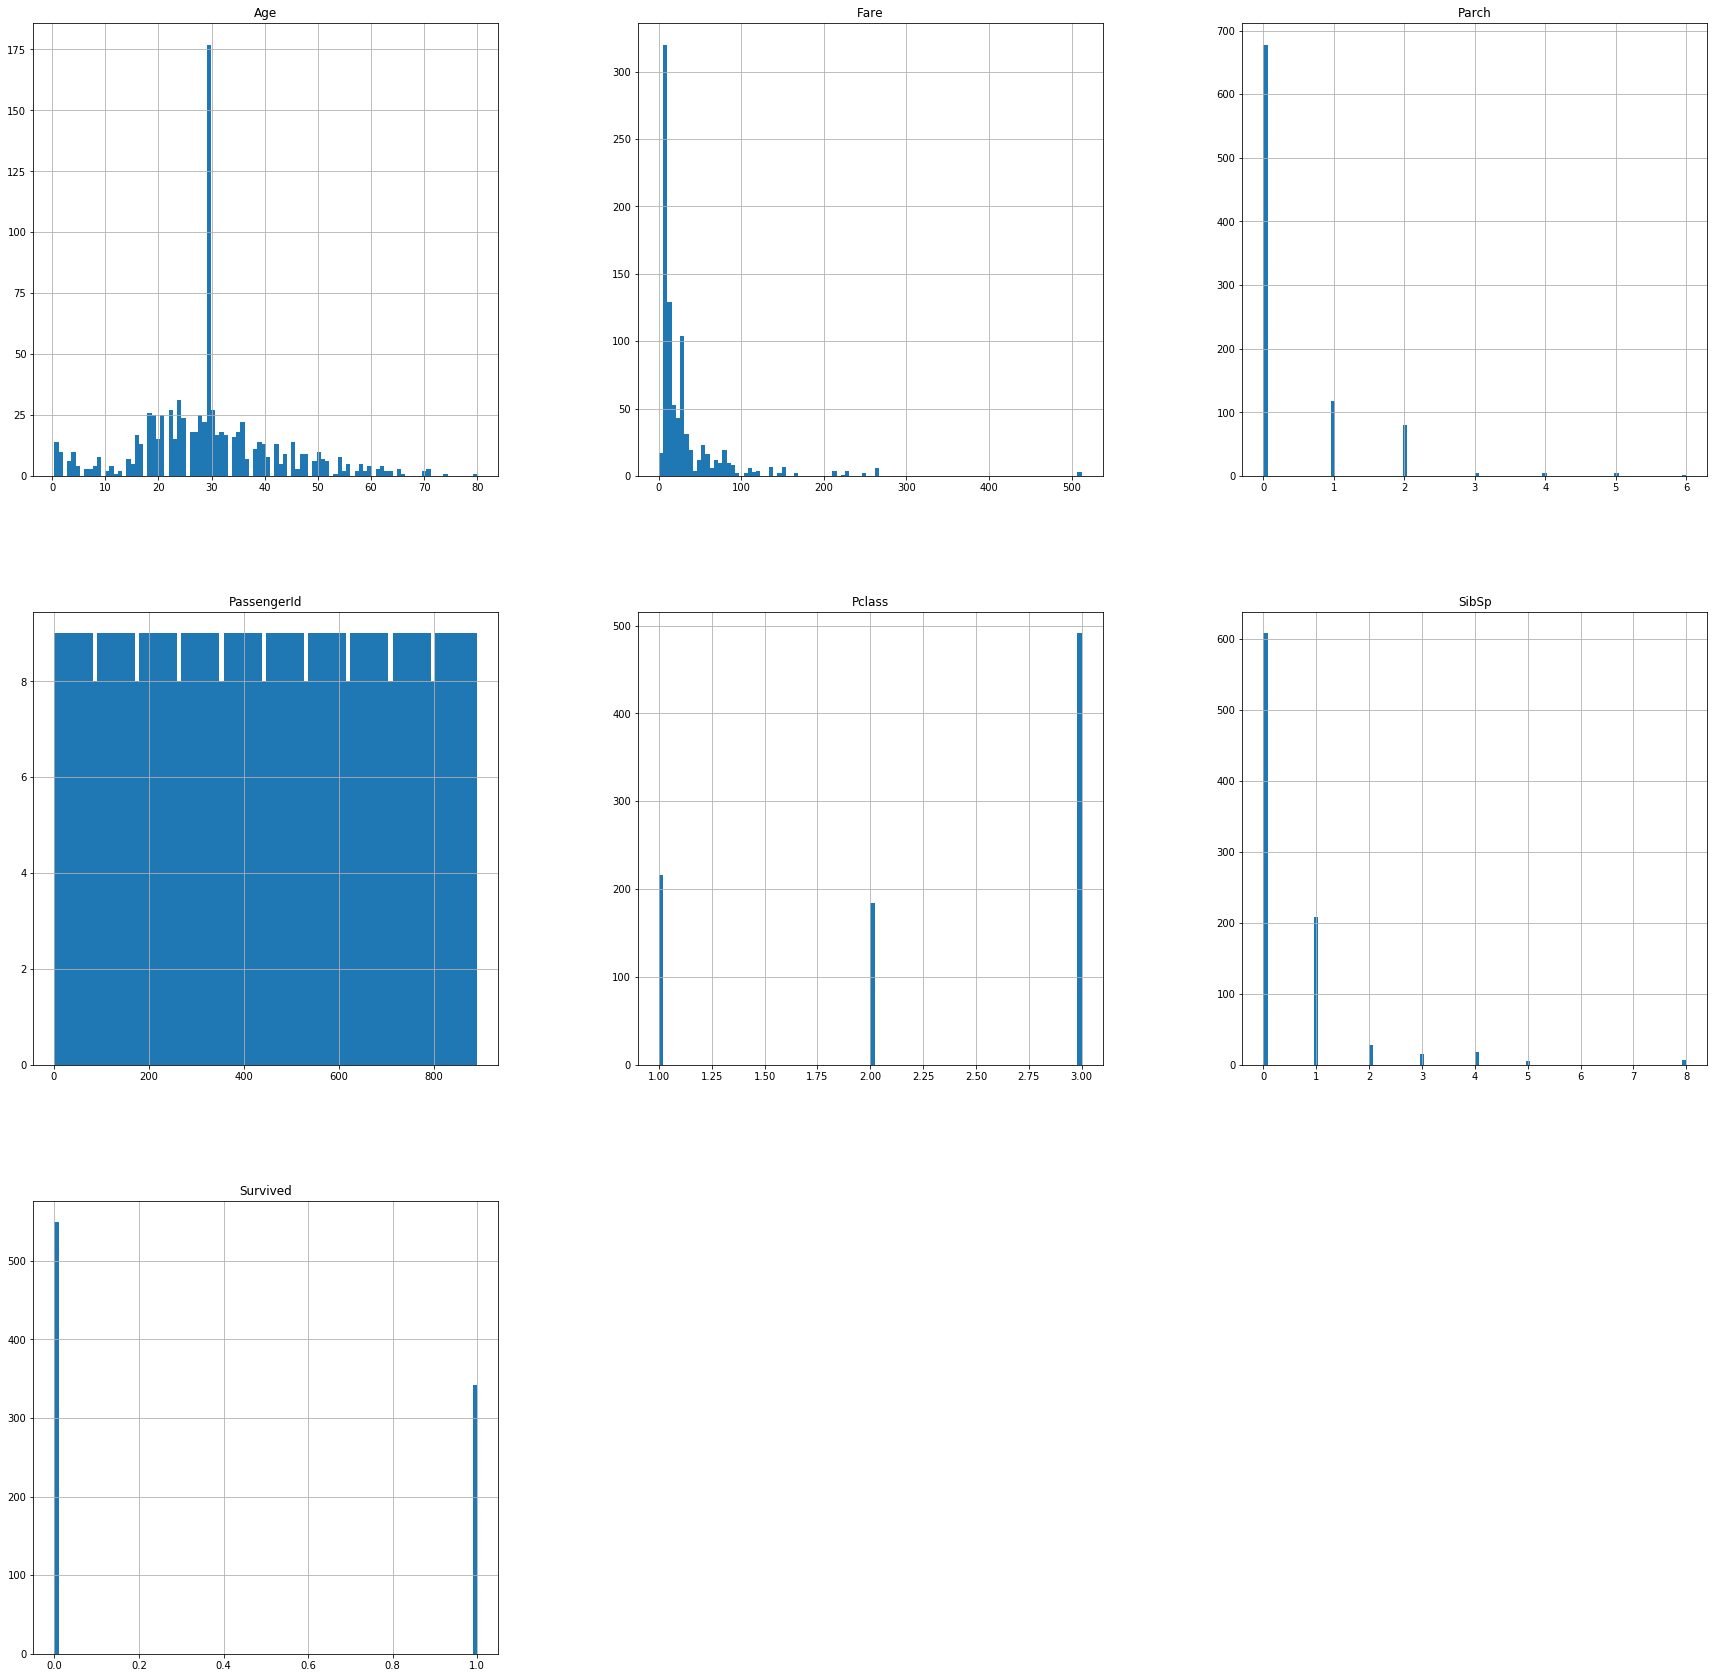

In [17]:
data.hist(bins = 100, figsize =(30,30))
plt.show()

### Looking for correlations

In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

In [20]:
#somewhat depends on age and P class

In [21]:
attributes = ['Survived', 'Pclass', 'Age', 'Parch', 'Fare']

[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

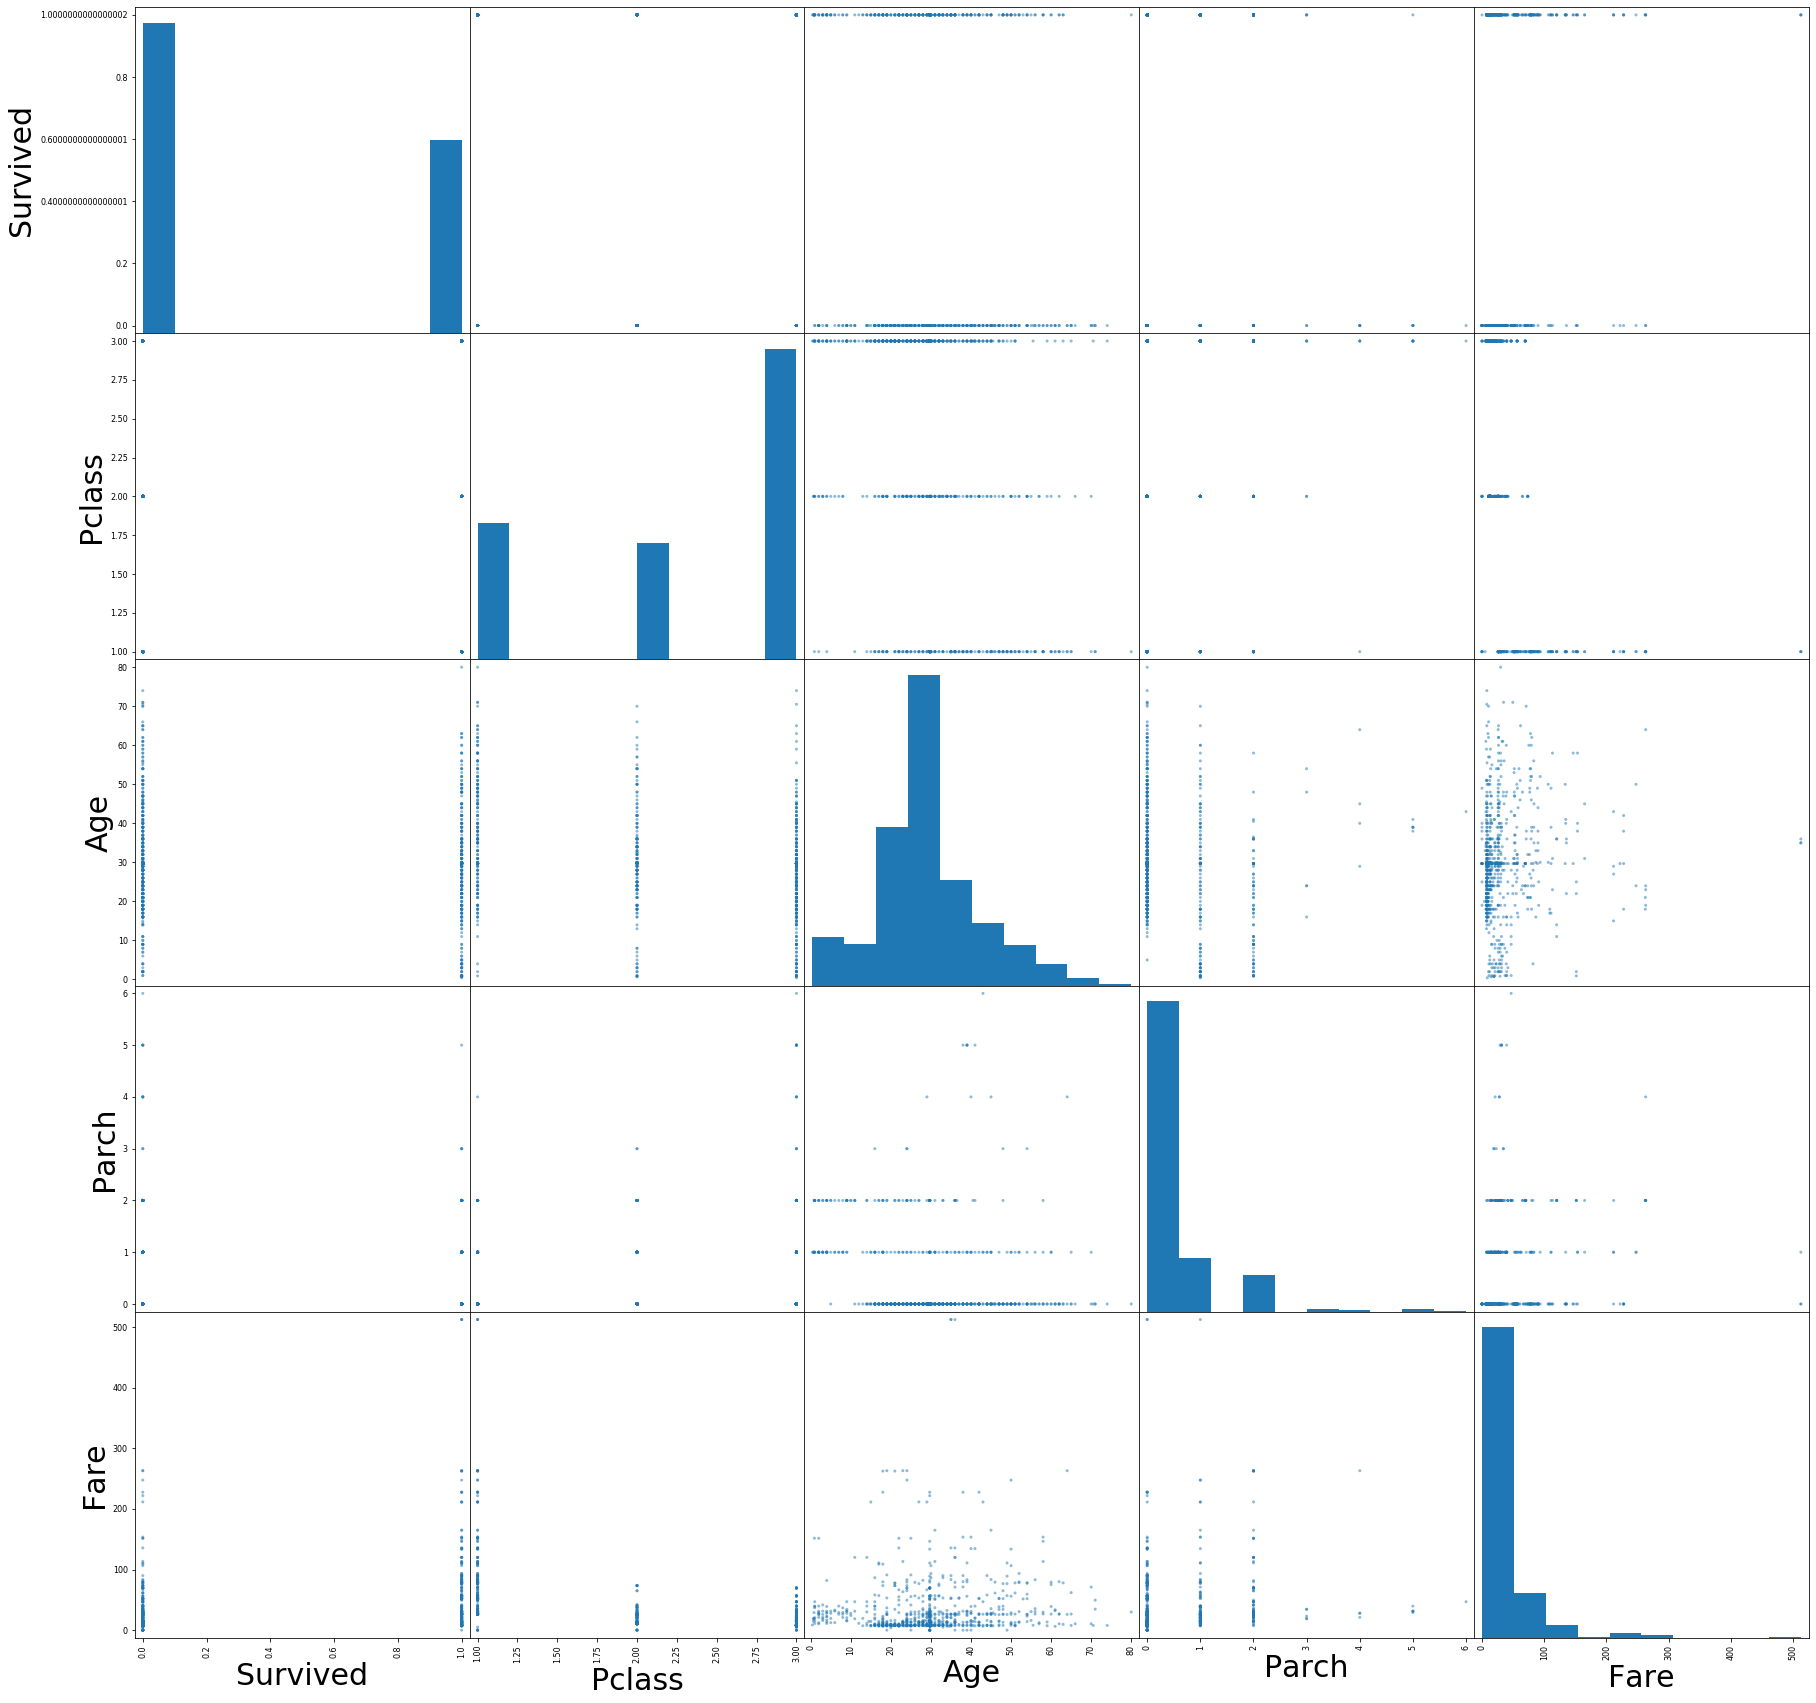

In [22]:
Axes = scatter_matrix(data[attributes], figsize = (30,30) )
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 30) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 30) for item in Axes.ravel()]

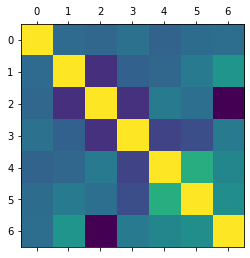

In [23]:
plt.matshow(data.corr())
plt.show()

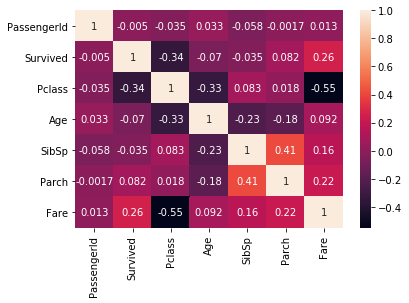

In [24]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
                    yticklabels = corr.columns.values, annot = True, cbar = True)

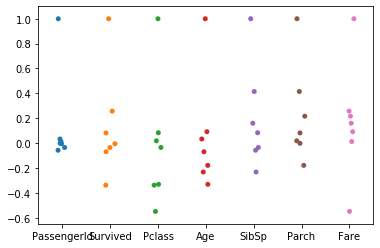

In [25]:
sns.stripplot(data =corr, jitter = True, dodge = True)

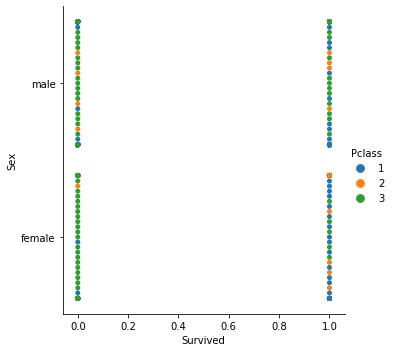

In [26]:
 sns.catplot(x = 'Survived', y = 'Sex', hue = 'Pclass', kind = 'swarm'  , data=data) 

In [27]:
# It is clear from the above catplot that the passenegrs with Pclass 1 tend to survive more

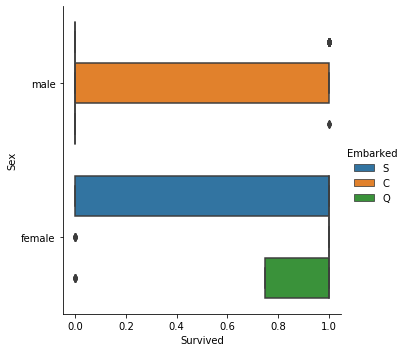

In [28]:
sns.catplot(x = 'Survived' , y = 'Sex' ,hue = 'Embarked',  kind = 'box' , data = data)


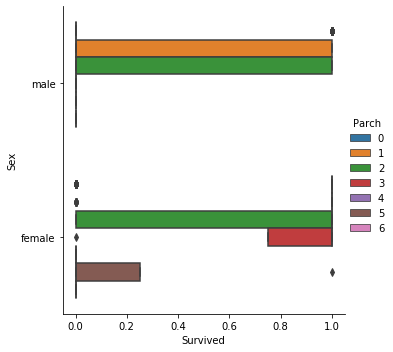

In [29]:
sns.catplot(x = 'Survived' , y = 'Sex' ,hue = 'Parch',  kind = 'box' , data = data)
# Passengers with parch 3 survived more

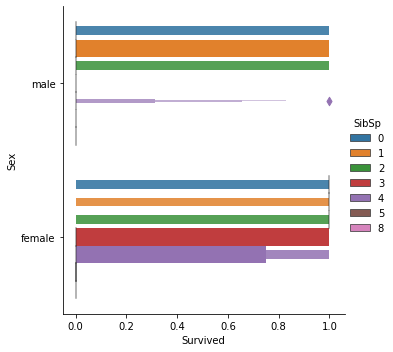

In [30]:
sns.catplot(x = 'Survived' , y = 'Sex' ,hue = 'SibSp',  kind = 'boxen' , data = data)


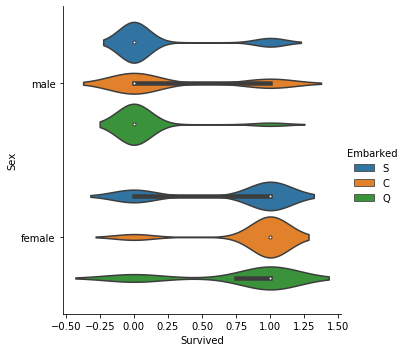

In [31]:
sns.catplot(x = 'Survived' , y = 'Sex' ,hue = 'Embarked',  kind = 'violin' , data = data)
# females survuved more than males. 

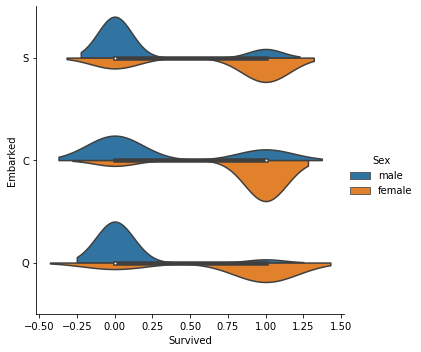

In [32]:
sns.catplot(x="Survived", y="Embarked", hue="Sex",
            kind="violin", split=True, data=data)
# females who were embarked in C survived more

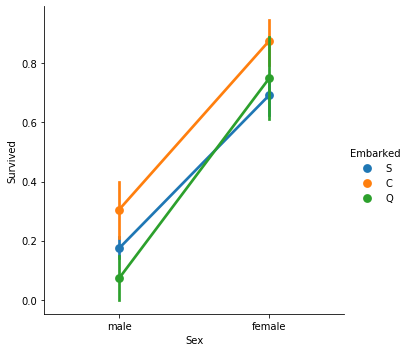

In [33]:
sns.catplot(x="Sex", y="Survived", hue="Embarked", kind="point", data=data)
#again, female with embarkment in C survived more